In [47]:
import os
import glob
from glob import glob
#import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Unfallorte_2016_LinRef.txt"


In [35]:
!pip install pandas

In [1]:
#alle CSV Dateien in eine bringen, Philipp nach Hilfe fragen
#stock_files = sorted(glob('test/data_*.csv'))
#stock_files

In [3]:
#pd.concat((pd.read_csv(file).assign(filename = file)
#           for file in stock_files), ignore_index = True)

In [7]:
!pip install seaborn

In [90]:
#Test
df = pd.read_csv(file_path, sep=";")

is_test = df.ULAND > 1
ls_test = df.ULAND < 3
#is_test = df.ULAND > 0o1
#ls_test = df.ULAND < 0o3
all_test = is_test & ls_test
[all_test]


[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 151668    False
 151669    False
 151670    False
 151671    False
 151672    False
 Name: ULAND, Length: 151673, dtype: bool]

In [119]:
#Einschränkung auf ULAND = 2, da ULAND = 2 Hamburg bedeutet.
Unfall_HH1 = df.ULAND == 2
Unfall_HH = df[Unfall_HH1]
Unfall_HH


,FID,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
6131,6131,6132,2,7,9,710,2016,2,16,4,...,0,1,0,1,0,0,"564235,409100000050000","5922776,339300000100000","9,967262657999999","53,450085612000002"
6134,6134,6135,2,1,19,140,2016,4,11,7,...,0,1,0,0,0,1,"561096,386900000040000","5930292,861600000400000","9,921464726000000","53,518013908999997"
6146,6146,6147,2,6,9,610,2016,1,13,2,...,0,1,1,0,0,0,"575365,408799999980000","5926700,454599999800000","10,135766858000000","53,483877243999999"
6147,6147,6148,2,1,1,102,2016,3,16,7,...,0,1,0,1,0,1,"565846,158900000040000","5933617,848000000200000","9,993789540000000","53,547322952000002"
6154,6154,6155,2,3,5,317,2016,2,18,1,...,0,1,0,0,0,0,"563732,327999999980000","5939531,975800000100000","9,963098544999999","53,600735749000002"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,99947,99948,2,7,1,701,2016,12,11,6,...,0,1,1,0,0,0,"564947,299099999950000","5923703,538499999800000","9,978172141000000","53,458331491000003"
99948,99948,99949,2,5,16,524,2016,12,8,6,...,1,1,0,0,0,0,"574966,443899999950000","5947436,102500000000000","10,134735136000000","53,670281314999997"
99949,99949,99950,2,3,8,320,2016,12,7,5,...,0,1,0,0,0,0,"560128,781700000050000","5940555,736100000300000","9,908848412999999","53,610362504000001"
99950,99950,99951,2,1,16,136,2016,12,14,2,...,1,0,0,0,0,1,"567238,922600000050000","5930419,406999999700000","10,014119308000000","53,518401390000001"


In [120]:
#Einschränkung auf IstRad = 1, weil es die Fahrradunfälle widerspiegelt
Fahrrad_Unfall = Unfall_HH.IstRad == 1
Fahrrad_Unfall1 = Unfall_HH[Fahrrad_Unfall]
##Test_NiclasBranch
Fahrrad_Unfall2 = Fahrrad_Unfall1.UKREIS == 2 


,FID,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
6188,6188,6189,2,6,2,603,2016,4,15,2,...,1,1,0,0,0,0,"582353,394399999990000","5926138,468299999800000","10,240903380000001","53,477779904000002"
6572,6572,6573,2,4,2,405,2016,2,15,4,...,1,1,0,0,0,0,"565114,366000000040000","5939258,010700000500000","9,983922804000001","53,598103684000002"
6589,6589,6590,2,4,8,418,2016,3,14,6,...,1,0,1,0,0,0,"567467,747500000060000","5937257,759899999900000","10,019045340000000","53,579829556000000"
6606,6606,6607,2,3,6,318,2016,3,13,7,...,1,1,0,0,0,0,"562842,417900000000000","5941421,184999999600000","9,950033651000000","53,617822046999997"
6695,6695,6696,2,2,9,221,2016,1,8,6,...,1,1,0,0,0,0,"555294,017299999950000","5936479,404400000300000","9,835057024999999","53,574258757000003"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,99939,99940,2,5,7,515,2016,12,12,3,...,1,0,0,0,0,0,"571810,542000000020000","5942728,550499999900000","10,085887652000000","53,628418396000001"
99942,99942,99943,2,5,7,515,2016,12,7,4,...,1,1,0,0,0,0,"572573,497699999950000","5941114,281200000100000","10,097046153999999","53,613806017000002"
99945,99945,99946,2,3,9,321,2016,12,21,4,...,1,1,0,0,0,0,"560927,436200000000000","5938261,819400000400000","9,920470078999999","53,589653980000001"
99948,99948,99949,2,5,16,524,2016,12,8,6,...,1,1,0,0,0,0,"574966,443899999950000","5947436,102500000000000","10,134735136000000","53,670281314999997"


In [132]:
Fahrrad_Unfall_Wochentag = Fahrrad_Unfall1.UWOCHENTAG >= 1
Fahrrad_Unfall_Wochentag
#Fahrrad_Unfall1 = Unfall_HH[Fahrrad_Unfall]
#Fahrrad_Unfall1

6188     True
6572     True
6589     True
6606     True
6695     True
         ... 
99939    True
99942    True
99945    True
99948    True
99950    True
Name: UWOCHENTAG, Length: 2206, dtype: bool

In [121]:
#df[l_test].head()
Fahrrad_Unfall1.head()

,FID,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
6188,6188,6189,2,6,2,603,2016,4,15,2,...,1,1,0,0,0,0,"582353,394399999990000","5926138,468299999800000","10,240903380000001","53,477779904000002"
6572,6572,6573,2,4,2,405,2016,2,15,4,...,1,1,0,0,0,0,"565114,366000000040000","5939258,010700000500000","9,983922804000001","53,598103684000002"
6589,6589,6590,2,4,8,418,2016,3,14,6,...,1,0,1,0,0,0,"567467,747500000060000","5937257,759899999900000","10,019045340000000","53,579829556000000"
6606,6606,6607,2,3,6,318,2016,3,13,7,...,1,1,0,0,0,0,"562842,417900000000000","5941421,184999999600000","9,950033651000000","53,617822046999997"
6695,6695,6696,2,2,9,221,2016,1,8,6,...,1,1,0,0,0,0,"555294,017299999950000","5936479,404400000300000","9,835057024999999","53,574258757000003"


In [127]:
Fahrrad_Unfall1.describe()

,FID,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,UART,UTYP1,ULICHTVERH,IstStrasse,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig
count,2206.000000,2206.000000,2206.0,2206.000000,2206.000000,2206.000000,2206.0,2206.000000,2206.000000,2206.000000,...,2206.000000,2206.000000,2206.000000,2206.000000,2206.0,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,87810.066183,87811.066183,2.0,3.322756,6.644152,347.585222,2016.0,6.908432,13.311423,4.125567,...,3.723935,3.789665,0.310517,0.230281,1.0,0.689483,0.081142,0.013146,0.024479,0.080236
std,26929.384655,26929.384655,0.0,1.700500,4.684982,168.803837,0.0,2.853132,4.583766,1.705030,...,1.916733,1.807568,0.690163,0.447222,0.0,0.462810,0.273115,0.113926,0.154565,0.271719
min,6188.000000,6189.000000,2.0,1.000000,1.000000,101.000000,2016.0,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95210.500000,95211.500000,2.0,2.000000,3.000000,211.000000,2016.0,5.000000,9.000000,3.000000,...,3.000000,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96654.000000,96655.000000,2.0,3.000000,5.000000,320.000000,2016.0,7.000000,14.000000,4.000000,...,5.000000,3.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,98069.750000,98070.750000,2.0,5.000000,9.000000,508.000000,2016.0,9.000000,17.000000,6.000000,...,5.000000,6.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,99950.000000,99951.000000,2.0,7.000000,20.000000,717.000000,2016.0,12.000000,23.000000,7.000000,...,9.000000,7.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='UMONAT', ylabel='count'>

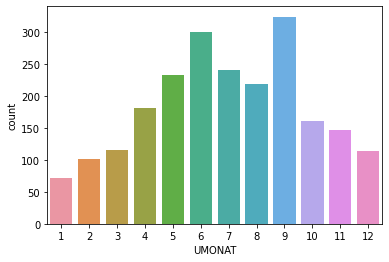

In [137]:
sns.countplot(data=Fahrrad_Unfall1, x="UMONAT")

<AxesSubplot:xlabel='UWOCHENTAG', ylabel='count'>

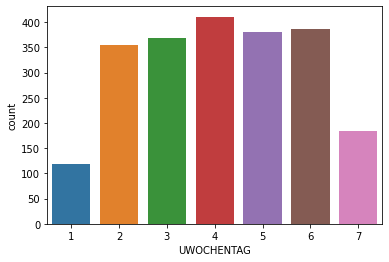

In [136]:
sns.countplot(data=Fahrrad_Unfall1, x="UWOCHENTAG")

<AxesSubplot:xlabel='USTUNDE', ylabel='count'>

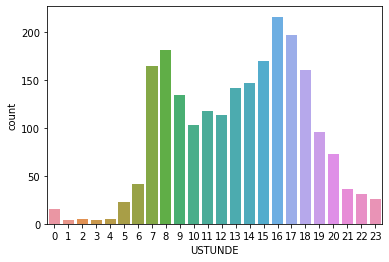

In [138]:
sns.countplot(data=Fahrrad_Unfall1, x="USTUNDE")

In [2]:
#Koordinaten aufrunden, Überschneidung finden
#Hilfe Philipp
#type(Fahrrad_Unfall1.LINREFX)
X_ROUND = Fahrrad_Unfall1.LINREFX
type(X_ROUND)
#round(X_ROUND, 5)

NameError: name 'Fahrrad_Unfall1' is not defined